In [0]:
# Importing proper libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster


from sklearn.cluster import KMeans
from sklearn import datasets

# 
np.random.seed(5)

In [1]:
# Downloading the sample data file
!git clone https://github.com/farbodj/PHY6795N---Notebooks.git

Cloning into 'PHY6795N---Notebooks'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [0]:
# Reading the data file
#

Col1 = []
Col2 = []

f=open('/content/PHY6795N---Notebooks/data.txt','r')
for line in f:
  if line[0]!='#':
    tmp=line.split()
    Col1.append(float(tmp[0]))
    Col2.append(float(tmp[1]))
f.close()

In [0]:
# Choosing number of clusters

k = 3
Kmeans = cluster.KMeans(n_clusters=k)

# Putting everything in a matrix

X=np.matrix(zip(Col1,Col2))

# K mean fitting

kmeans = Kmeans.fit(X)

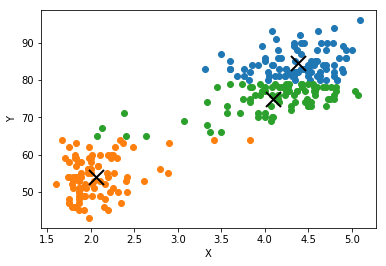

In [13]:
# labels tells us the group number of each of these classified data

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the data

for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Let's say we want to classify flowers based on their petal and sepal sizes.

![alt text](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png)

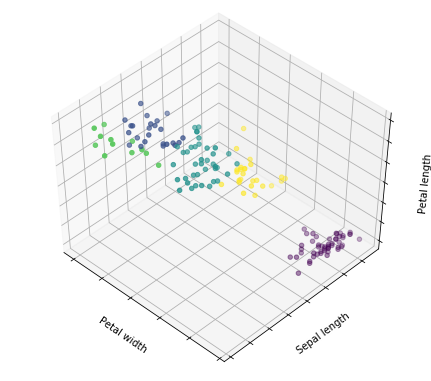

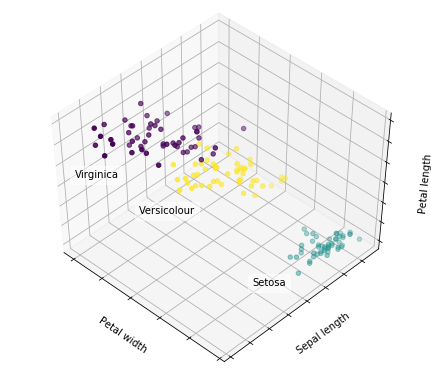

In [16]:
# Loading the iris data from the sklearn library

iris = datasets.load_iris()
X = iris.data
y = iris.target

est = KMeans(n_clusters=5)

# This time the data is 3D

fignum = 1

fig = plt.figure(fignum, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

fignum = fignum + 1

fig = plt.figure(fignum, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

![alt text](https://camo.githubusercontent.com/c13c8f4c0909bba232ecee850ee9137820c23d43/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f697269732d6d616368696e656c6561726e696e672e706e67)